### Post Analysis and Minor Data Processing

As the pre-processing of the retrieved DNA sequence were finished through the **QIIME command lines**, I think it would be better to present the visualization and some statistics in a Jupyter notebook environment. In this section, I utilize the popular Python libraries to read the processed data (`pandas`) and visualize (`matplotlib`) it.

Moreover, `Dokdo API` was also utilized to easily read .qzv files generated from QIIME pipeline instead of browsing into the QIIME view web page. This API provides convenience in obtaining the diversity plot, taxa bar plots, heatmaps, and so on.

In [1]:
import pandas as pd 

df = pd.read_csv('order.tsv',sep = '\t',index_col=0, encoding='utf-8')

# Convert Abundances to Float Data Type
abundance = df.columns[1:]
df[abundance] = df[abundance].apply(pd.to_numeric, errors='coerce')
df.dtypes

d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales                    object
d__Bacteria;p__Cloacimonadota;c__Cloacimonadia;o__Cloacimonadales             float64
d__Bacteria;p__Firmicutes_D;c__Bacilli;o__Lactobacillales                     float64
d__Bacteria;p__Chloroflexota;c__Anaerolineae;o__Anaerolineales                float64
d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales        float64
                                                                               ...   
d__Bacteria;p__Firmicutes_D;c__Bacilli;o__Erysipelotrichales                  float64
d__Bacteria;p__Omnitrophota;c__Koll11;o__UBA6215                              float64
d__Bacteria;p__Dependentiae;c__Babeliae;o__Babeliales                         float64
d__Bacteria;p__Ratteibacteria;c__UBA8468;o__B48-G9                            float64
d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Steroidobacterales    float64
Length: 82, dtype: object

The order.tsv file, was obtained from taxonomic bar plot retrieved in the QIIME CLI pipeline. The values presented were expressed in relative abundance, and slight modifications were done to organize the representation of the percentage abundances.

In [2]:
df.columns = df.columns.str.extract(r'o__(\w+)')[0]
df = df.drop('#q2:types',axis=0)

df.iloc[:,1:] = df.iloc[:,1:] *100
df.iloc[:,1:] = df.iloc[:,1:].round(2)
df.head()

,Bacteroidales,Cloacimonadales,Lactobacillales,Anaerolineales,Pedosphaerales,Methanotrichales,NaN,Propionibacteriales,Synergistales,Syntrophales,...,Aminicenantales,UBA1400,Pacearchaeales,Rhizobiales_A_504721,Acidimicrobiales,Erysipelotrichales,UBA6215,Babeliales,B48,Steroidobacterales
id,,,,,,,,,,,,,,,,,,,,,
DRR317292,0.306540583136328,14.22,4.49,10.80,1.85,2.29,1.65,4.02,3.43,1.22,...,0.00,0.00,0.0,0.08,0.08,0.08,0.08,0.00,0.00,0.00
DRR317293,0.273373983739837,11.25,3.46,13.45,4.51,3.12,2.07,3.29,4.57,2.61,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.07,0.07,0.00
DRR317294,0.281674208144796,11.73,3.39,11.69,4.00,4.64,2.38,3.28,4.15,2.04,...,0.11,0.11,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.08
DRR317295,0.254363163757891,10.29,5.94,13.33,3.08,3.12,3.19,4.98,2.97,2.30,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DRR317296,0.353814432989691,12.66,13.11,10.19,1.61,3.13,1.32,3.34,1.94,1.20,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
row_sums = df.iloc[:,1:].sum(axis=1)
print(row_sums)

id
DRR317292    69.38
DRR317293    72.69
DRR317294    71.84
DRR317295    74.58
DRR317296    64.63
DRR317297    63.24
dtype: float64


As shown from the row_sums, it doesn't achieve the 100 % maximum classification of the species for each samples. As an additional task, a new column can be added labeled as *"Others"* to consider the remaining microorganisms that were not assigned at the order taxonomic level.

From that output, the relative abundance dataframe is can be saved as .csv file as the resulting data retrieved from those raw sequences pre-processed in the QIIME pipeline. Further stastistical analysis can be utilized or visualizations can be done on this result depending on the objectives of the researcher.

In [4]:
df['Others'] = 100 - row_sums
df.columns

Index([        'Bacteroidales',       'Cloacimonadales',
             'Lactobacillales',        'Anaerolineales',
              'Pedosphaerales',      'Methanotrichales',
                           nan,   'Propionibacteriales',
               'Synergistales',          'Syntrophales',
          'Syntrophorhabdales',  'Peptostreptococcales',
                     'UBA1062',   'Syntrophobacterales',
                           nan,        'Atribacterales',
       'Saccharofermentanales',        'Tissierellales',
                       'BM507',                   'LD1',
                         'SG8',        'Lachnospirales',
                           nan,                'DTU014',
               'Geobacterales',        'Treponematales',
           'Acidaminococcales',         'Clostridiales',
                         'CG2',    'Hydrogenedentiales',
             'Oscillospirales',    'Syntrophomonadales',
          'Christensenellales',   'Gastranaerophilales',
                           nan,

In [ ]:
# This API can be installed using the terminal
# git clone https://github.com/sbslee/dokdo
# cd dokdo
# pip install .

### Dokdo API
This section is to demonstrate using dokdo API to quickly visualize the .qzv file which is the output visualization file of the QIIME2 pipeline. Data visualization can provide insights on the raw sequences based on the metadata associated into it.

In [5]:
import dokdo
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: xlabel='Sequencing depth', ylabel='shannon'>

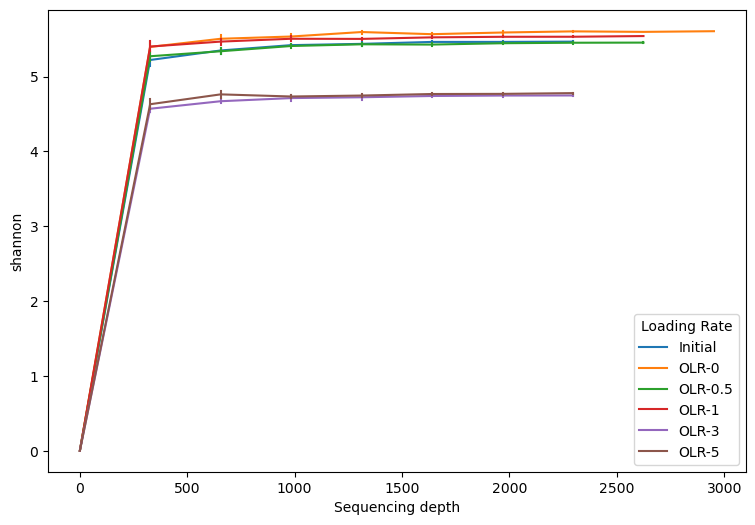

In [10]:
qzv_file = 'output/alpha-rarefaction.qzv'
dokdo.alpha_rarefaction_plot(qzv_file,hue='Loading Rate',metric='shannon',figsize=(9,6))

An alpha-rarefaction curve is illustrated on this plot which demonstrates the microbial diversity on the each sample. As you can observe, as the organic loading rate increases (based on the label of each sample), the diversity significantly decrease especially on the OLR-3 and OLR-5. This provides an insight that organic loading shock can be observed on AD system at a short period of time which is also the same insight as stated by the proponents of this study (Mercado et al., 2022).

The loading rate ranging between OLR-0 up to OLR-1 indicates a high microbial diversity as described by the Shannon index, an ecological parameter known to evaluate diversity within the habitat (represented by each sample).

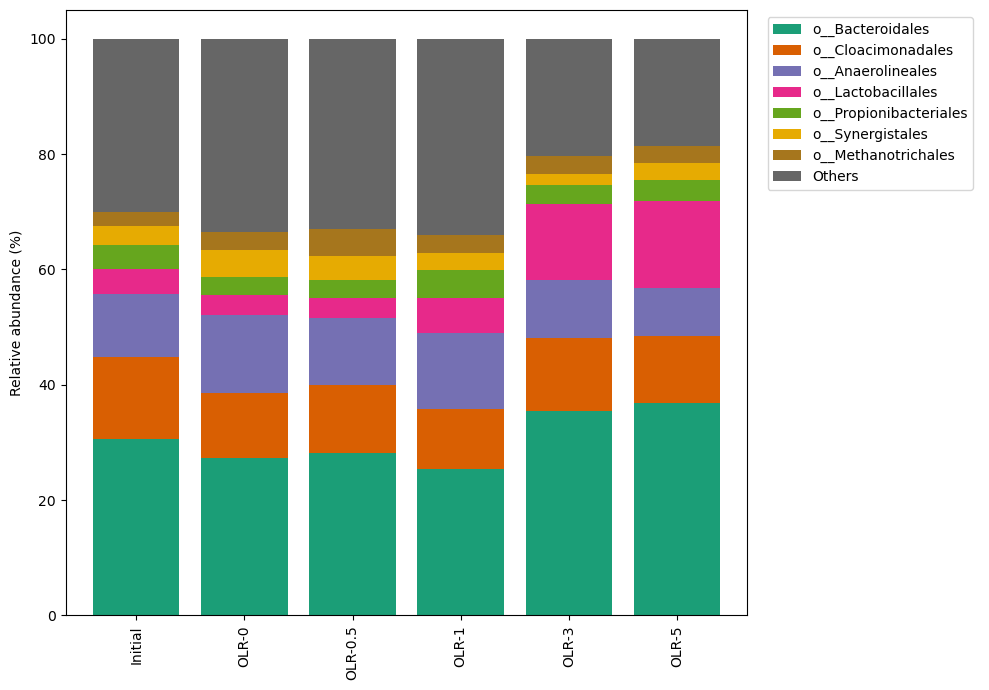

In [7]:
qzv_file = 'output/taxa-bar-plots.qzv'
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [9, 1]})
dokdo.taxa_abundance_bar_plot(
    qzv_file,
    by=['Loading Rate'],
    label_columns = ['Loading Rate'],
    ax=ax1,
    level=4,
    count=8,
    cmap_name= 'Dark2',
    legend=False
)

dokdo.taxa_abundance_bar_plot(
    qzv_file,
    by=['Loading Rate'],
    label_columns = ['Loading Rate'],
    ax=ax2,
    level=4,
    count=8,
    cmap_name= 'Dark2',
    legend_short=True
)

handles, labels = ax2.get_legend_handles_labels()

ax2.clear()
ax2.legend(handles, labels)
ax2.axis('off')

plt.tight_layout()

Reference Data: Mercado, J.V., Koyama, M., Nakasaki, K., 2022. Short-term changes in the anaerobic digestion microbiome and biochemical pathways with changes in organic load. Sci. Total
Environ. 813, 152585.